In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("diamonds.csv")

In [3]:
data.head()

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low


In [4]:
data.describe()

,index,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
 10  price    53940 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 4.5+ MB


In [6]:
data.isnull().sum()

index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [7]:
data.duplicated().any()

False

In [8]:
data.groupby(by="price").count()

,index,carat,cut,color,clarity,depth,table,x,y,z
price,,,,,,,,,,
High,2308,2308,2308,2308,2308,2308,2308,2308,2308,2308
Low,11271,11271,11271,11271,11271,11271,11271,11271,11271,11271
Medium,4109,4109,4109,4109,4109,4109,4109,4109,4109,4109
Very High,1589,1589,1589,1589,1589,1589,1589,1589,1589,1589
Very Low,34663,34663,34663,34663,34663,34663,34663,34663,34663,34663


In [9]:
data.price.value_counts()

Very Low     34663
Low          11271
Medium        4109
High          2308
Very High     1589
Name: price, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

In [13]:
label_encoder = LabelEncoder()

In [14]:
yedek_veri = data.copy()

In [15]:
yedek_veri["new_cut"] = label_encoder.fit_transform(yedek_veri["cut"]) 
yedek_veri.head()

,index,carat,cut,color,clarity,depth,table,x,y,z,price,new_cut
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low,2
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low,3
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low,1
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low,3
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low,1


In [16]:
yedek_veri = yedek_veri.drop(["cut"],axis=1)

In [17]:
yedek_veri["new_clarity"] = label_encoder.fit_transform(yedek_veri["clarity"]) 
yedek_veri = yedek_veri.drop(["clarity"],axis=1)
yedek_veri.head()

,index,carat,color,depth,table,x,y,z,price,new_cut,new_clarity
0,1,0.23,E,61.5,55.0,3.95,3.98,2.43,Very Low,2,3
1,2,0.21,E,59.8,61.0,3.89,3.84,2.31,Very Low,3,2
2,3,0.23,E,56.9,65.0,4.05,4.07,2.31,Very Low,1,4
3,4,0.29,I,62.4,58.0,4.20,4.23,2.63,Very Low,3,5
4,5,0.31,J,63.3,58.0,4.34,4.35,2.75,Very Low,1,3


In [18]:
yedek_veri["new_color"] = label_encoder.fit_transform(yedek_veri["color"]) 
yedek_veri = yedek_veri.drop(["color"],axis=1)
yedek_veri.head()

,index,carat,depth,table,x,y,z,price,new_cut,new_clarity,new_color
0,1,0.23,61.5,55.0,3.95,3.98,2.43,Very Low,2,3,1
1,2,0.21,59.8,61.0,3.89,3.84,2.31,Very Low,3,2,1
2,3,0.23,56.9,65.0,4.05,4.07,2.31,Very Low,1,4,1
3,4,0.29,62.4,58.0,4.20,4.23,2.63,Very Low,3,5,5
4,5,0.31,63.3,58.0,4.34,4.35,2.75,Very Low,1,3,6


In [19]:
yedek_veri["Label"] = label_encoder.fit_transform(yedek_veri["price"]) 
yedek_veri.head()

,index,carat,depth,table,x,y,z,price,new_cut,new_clarity,new_color,Label
0,1,0.23,61.5,55.0,3.95,3.98,2.43,Very Low,2,3,1,4
1,2,0.21,59.8,61.0,3.89,3.84,2.31,Very Low,3,2,1,4
2,3,0.23,56.9,65.0,4.05,4.07,2.31,Very Low,1,4,1,4
3,4,0.29,62.4,58.0,4.20,4.23,2.63,Very Low,3,5,5,4
4,5,0.31,63.3,58.0,4.34,4.35,2.75,Very Low,1,3,6,4


In [21]:
yedek_veri["Label"].value_counts()

4    34663
1    11271
2     4109
0     2308
3     1589
Name: Label, dtype: int64

In [22]:
categories = list(label_encoder.inverse_transform([0, 1, 2, 3, 4]))
categories

['High', 'Low', 'Medium', 'Very High', 'Very Low']

In [23]:
clases = list(set(yedek_veri.price))
yedek_veri.drop(["index","price"], axis=1, inplace=True)

In [24]:
yedek_veri.head()

,carat,depth,table,x,y,z,new_cut,new_clarity,new_color,Label
0,0.23,61.5,55.0,3.95,3.98,2.43,2,3,1,4
1,0.21,59.8,61.0,3.89,3.84,2.31,3,2,1,4
2,0.23,56.9,65.0,4.05,4.07,2.31,1,4,1,4
3,0.29,62.4,58.0,4.20,4.23,2.63,3,5,5,4
4,0.31,63.3,58.0,4.34,4.35,2.75,1,3,6,4


<Figure size 1152x576 with 0 Axes>

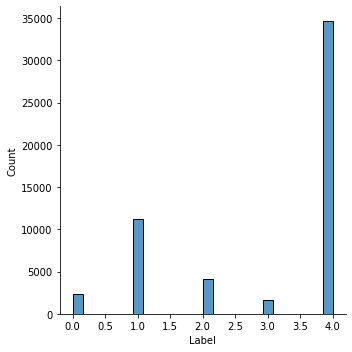

In [25]:
import seaborn as sns
plt.figure(figsize=(16, 8))
sns.displot(yedek_veri["Label"])

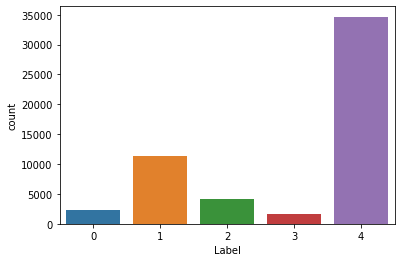

In [26]:
sns.countplot(x="Label", data=yedek_veri)

In [27]:
X, y = yedek_veri.iloc[: , :-1], yedek_veri.iloc[: , -1]

In [28]:
X

,carat,depth,table,x,y,z,new_cut,new_clarity,new_color
0,0.23,61.5,55.0,3.95,3.98,2.43,2,3,1
1,0.21,59.8,61.0,3.89,3.84,2.31,3,2,1
2,0.23,56.9,65.0,4.05,4.07,2.31,1,4,1
3,0.29,62.4,58.0,4.20,4.23,2.63,3,5,5
4,0.31,63.3,58.0,4.34,4.35,2.75,1,3,6
...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,2,2,0
53936,0.72,63.1,55.0,5.69,5.75,3.61,1,2,0
53937,0.70,62.8,60.0,5.66,5.68,3.56,4,2,0
53938,0.86,61.0,58.0,6.15,6.12,3.74,3,3,4


In [29]:
y

0        4
1        4
2        4
3        4
4        4
        ..
53935    4
53936    4
53937    4
53938    4
53939    4
Name: Label, Length: 53940, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

##Desicion Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.8667644373114918
Accuracy of test: 0.8655131734172238


**Bias for training = 1-0.86 = 0.14**

**Bias for test = 1-0.86 = 0.14**

**Variance = test bias - training bias = 0.0**

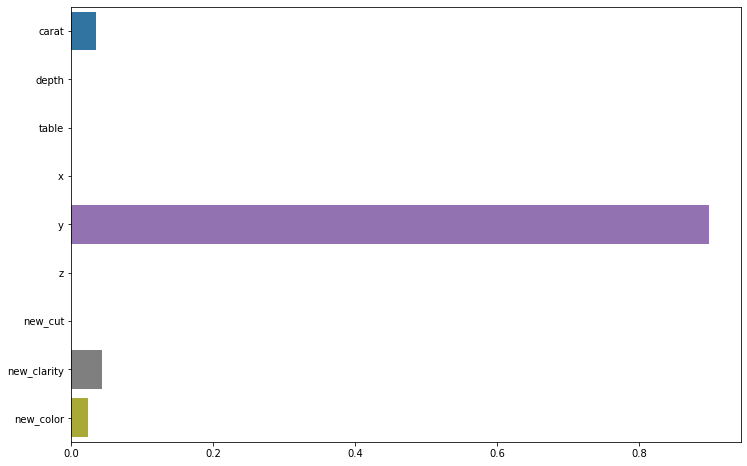

In [34]:
plt.figure(figsize=(12, 8))
importance = clf.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

In [35]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score

In [36]:
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.48      0.51      0.49       769
           1       0.76      0.81      0.79      3663
           2       0.63      0.47      0.54      1357
           3       0.59      0.61      0.60       517
           4       0.96      0.96      0.96     11495

    accuracy                           0.87     17801
   macro avg       0.68      0.67      0.68     17801
weighted avg       0.86      0.87      0.86     17801



In [37]:
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.6836907760011475
Recall = 0.6736387455955773
Accuracy = 0.8655131734172238
F1 Score = 0.676103734662326


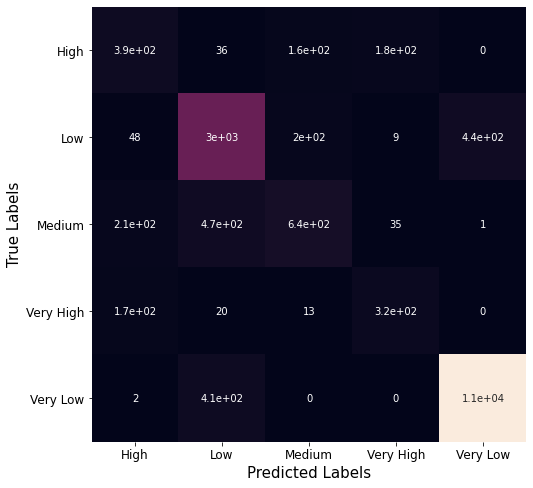

In [38]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

👉**Desicion Tree algoritmasında bias değeri yüksek, variance ise 0 çıktı. Underfitting durumu yaşandığını düşünüyorum. İlk olarak başka bir algoritmayla daha deneyeceğim**

##Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
from sklearn.model_selection import cross_validate

In [49]:
models = LogisticRegression(random_state=42,n_jobs=-1)
cv = cross_validate(models,X_train,y_train,cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test,y_test)))

Mean training accuracy: 0.8488889993888796
Test accuracy: 0.8432110555586765


**Bias for training = 1-0.86 = 0.14**

**Bias for test = 1-0.86 = 0.14**

**Variance = test bias - training bias = 0.0**

👉**Logistic Regression algoritmasıyla geliştirdiğim modelde de bias değeri çok yüksek, Variance değeri çok düşük çıktı. Underfitting durumunun veri setinden kaynaklandığını düşünüyorum.**

##Underfitting

In [55]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.10, random_state=42)

In [56]:
models = LogisticRegression(random_state=42,n_jobs=-1)
cv = cross_validate(models,X_train1,y_train1,cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test1,y_test1)))

Mean training accuracy: 0.846681497960697
Test accuracy: 0.8516870596959585


**Bias for training = 1-0.84 = 0.16**

**Bias for test = 1-0.85 = 0.15**

**Variance = test bias - training bias = 0.01**

👉**Train setindeki verilerin oranını arttırak Underfitting durumunu önlemeye çalıştım ancak yeterli olmadı. Variance hala 0.01 ve bias değerleri yüksek. Veri setindeki attribute sayısının çok fazla olması y değerinin diğer attributeları ezdiğini düşünüyorum.**

In [58]:
y_silinmis = yedek_veri.drop(columns="y", axis=1)

In [59]:
y_silinmis.head()

,carat,depth,table,x,z,new_cut,new_clarity,new_color,Label
0,0.23,61.5,55.0,3.95,2.43,2,3,1,4
1,0.21,59.8,61.0,3.89,2.31,3,2,1,4
2,0.23,56.9,65.0,4.05,2.31,1,4,1,4
3,0.29,62.4,58.0,4.20,2.63,3,5,5,4
4,0.31,63.3,58.0,4.34,2.75,1,3,6,4


In [64]:
X_new, y_new = y_silinmis.iloc[: , :-1], y_silinmis.iloc[: , -1]

In [61]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

In [63]:
models = LogisticRegression(random_state=42,n_jobs=-1)
cv = cross_validate(models,X_train2,y_train2,cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test2,y_test2)))

Mean training accuracy: 0.8435828168864877
Test accuracy: 0.853417377332839


**Bias for training = 1-0.84 = 0.16**

**Bias for test = 1-0.85 = 0.15**

**Variance = test bias - training bias = 0.01**

In [65]:
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train2,y_train2)
print("Accuracy of train:",clf.score(X_train2,y_train2))
print("Accuracy of test:",clf.score(X_test2,y_test2))

Accuracy of train: 0.8629429524868902
Accuracy of test: 0.8618835743418614


**Bias for training = 1-0.86 = 0.14**

**Bias for test = 1-0.86 = 0.14**

**Variance = test bias - training bias = 0.0**

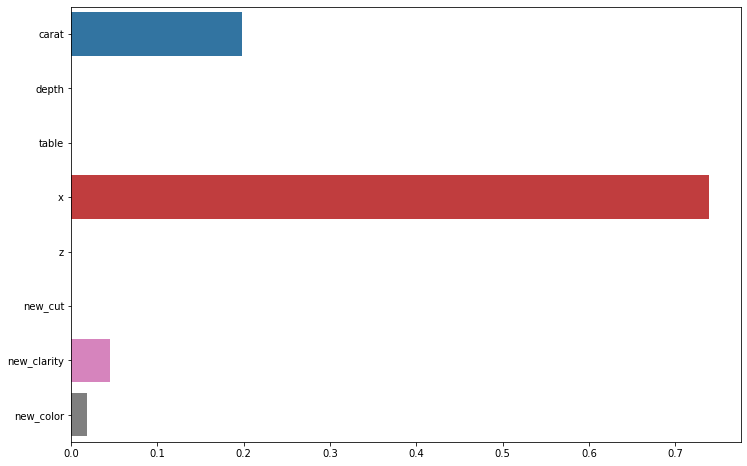

In [67]:
plt.figure(figsize=(12, 8))
importance = clf.feature_importances_
sns.barplot(x=importance, y=X_new.columns)
plt.show()

##Results

Diamonds veri setinden yola çıkarak oluşturduğum modellerde ilk başta Underfitting durumu oluştu. Underfitting'in yetersiz veri ve fazla attribute sayısından oluşabileceğini bildiğim için öncelikle train veri setini arttırdım ancak underfitting devam etti. Barplot grafiğinden sonucu en çok etkileyen attribute kolonunun y kolonu olduğunu fark ettim. Bu nedenle veri setinden y kolonunu çıkarttım ancak bu sefer de x kolonu diğer attribute'ları ezerek sonucu etkiledi. Underfitting durumu önlenemedi.